In [11]:
import pandas as pd
import sqlite3
import datetime
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import math
import Cdf
import Pmf
mpl.rcParams['figure.dpi'] = 200
okabe_ito = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
sns.set_context('paper')
sns.set_palette(sns.color_palette(okabe_ito))
#https://stackoverflow.com/a/45846841
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
def make_cdf(series):
    return series.value_counts(normalize=True).sort_index().cumsum()
def make_pdf(series):
    return series.value_counts(normalize=True).sort_index()

In [12]:
conn = sqlite3.connect('../web-performance/web-performance.db')
measurements = pd.read_sql_query("SELECT * FROM measurements", conn)
measurements
#conn.close()

,msm_id,py_time,js_time,resource_time_origin,protocol,server,domain,vantagePoint,timestamp,suggested_quality,player_width,player_height,start_time,play_time,video_ids,cacheWarming,error
0,24fdef1c-a087-9736-abf0-4913a80e3f88,1645035501654826015,1.645036e+12,1.645035e+12,udp,94.140.14.140,aqz-KE-bpKQ,,2022-02-16 18:18:15.390571,auto,256,144,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",1,
1,7618731e-77bb-398c-804f-8749bd91e64e,1645035536935937261,1.645036e+12,1.645036e+12,udp,94.140.14.140,aqz-KE-bpKQ,,2022-02-16 18:18:23.047468,auto,256,144,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",0,
2,08a69630-1ba1-f7b7-9772-85bab6baa8bd,1645035545470292046,1.645036e+12,1.645036e+12,udp,94.140.14.140,lqiN98z6Dak,,2022-02-16 18:18:58.724641,auto,256,144,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",1,
3,72a7b5e0-9b49-0569-7eb7-bfe57806c0af,1645035580702717686,1.645036e+12,1.645036e+12,udp,94.140.14.140,lqiN98z6Dak,,2022-02-16 18:19:06.852357,auto,256,144,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",0,
4,71f797b6-e500-e0e3-b922-41aca902dd43,1645035593619247412,1.645036e+12,1.645036e+12,udp,94.140.14.140,aqz-KE-bpKQ,,2022-02-16 18:19:47.403376,tiny,256,144,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,588a971c-87c2-5f5c-e0d5-795b7aa4c308,1645049192431194860,1.645049e+12,1.645049e+12,udp,94.140.14.140,aqz-KE-bpKQ,,2022-02-16 22:05:58.047199,hd2160,3840,2160,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",0,
602,1ab93042-62b8-1d71-b39b-291b3f0520b7,1645049200465561237,1.645049e+12,1.645049e+12,udp,94.140.14.140,lqiN98z6Dak,,2022-02-16 22:06:34.294722,hd2160,3840,2160,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",1,
603,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,1645049236076280394,1.645049e+12,1.645049e+12,udp,94.140.14.140,lqiN98z6Dak,,2022-02-16 22:06:41.855754,hd2160,3840,2160,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",0,
604,88557a9e-8aae-37f8-0380-fd547aac23eb,1645049244965274381,1.645049e+12,1.645049e+12,udp,94.140.14.140,RJnKaAtBPhA,,2022-02-16 22:07:18.893514,hd2160,3840,2160,0,30,"aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA",1,


In [13]:
measurements.dtypes

msm_id                   object
py_time                   int64
js_time                 float64
resource_time_origin    float64
protocol                 object
server                   object
domain                   object
vantagePoint             object
timestamp                object
suggested_quality        object
player_width              int64
player_height             int64
start_time                int64
play_time                 int64
video_ids                object
cacheWarming              int64
error                    object
dtype: object

In [14]:
measurements['js_time'] = pd.to_datetime(measurements['js_time'], unit='ms', origin='unix')

In [15]:
measurements['resource_time_origin'] = pd.to_datetime(measurements['resource_time_origin'], unit='ms', origin='unix')

In [16]:
measurements['py_time'] = pd.to_datetime(measurements['py_time'], unit='ns', origin='unix')

In [18]:
measurements['timestamp'] = pd.to_datetime(measurements['timestamp'])

In [22]:
measurements[measurements.error != ""].error.unique()

array(['failed loading player ### Message: javascript error: player.cueVideoById is not a function\n  (Session info: headless chrome=98.0.4758.80)\nStacktrace:\n#0 0x563579225113 <unknown>\n#1 0x563578ced6d8 <unknown>\n#2 0x563578cf055c <unknown>\n#3 0x563578cf0356 <unknown>\n#4 0x563578cf0ef2 <unknown>\n#5 0x563578d55523 <unknown>\n#6 0x563578d41062 <unknown>\n#7 0x563578d5490b <unknown>\n#8 0x563578d40f53 <unknown>\n#9 0x563578d16bda <unknown>\n#10 0x563578d17ca5 <unknown>\n#11 0x5635792568dd <unknown>\n#12 0x56357926fa9b <unknown>\n#13 0x5635792586b5 <unknown>\n#14 0x563579270725 <unknown>\n#15 0x56357924c08f <unknown>\n#16 0x56357928d188 <unknown>\n#17 0x56357928d308 <unknown>\n#18 0x5635792a7a6d <unknown>\n#19 0x7f6953441609 <unknown>\n',
       'failed loading player ### Message: javascript error: player.cueVideoById is not a function\n  (Session info: headless chrome=98.0.4758.80)\nStacktrace:\n#0 0x56044473c113 <unknown>\n#1 0x5604442046d8 <unknown>\n#2 0x56044420755c <unknown>

In [50]:
df_start_time = pd.read_sql_query("""
SELECT start_time, play_time, msm_id FROM
(SELECT time AS start_time, msm_id FROM iframe_api WHERE event_type = 'PlayStartedFromFunction')
JOIN
(SELECT time AS play_time, msm_id FROM iframe_api WHERE event_type = 'PlayerStatePLAYING')
USING (msm_id);
""", conn)

In [52]:
df_start_time['start_time'] = pd.to_datetime(df_start_time['start_time'], unit='ms', origin='unix')
df_start_time['play_time'] = pd.to_datetime(df_start_time['play_time'], unit='ms', origin='unix')

In [61]:
df_start_time['startup_delay'] = (df_start_time['play_time'] - df_start_time['start_time']).dt.total_seconds()

In [62]:
df_start_time.startup_delay.median()

0.358249984

In [63]:
df_nerd_stats_resolutions = pd.read_sql_query("""
SELECT DISTINCT msm_id, resolution FROM nerd_stats
""", conn)

In [67]:
df_nerd_stats_resolutions.groupby('msm_id').agg({'resolution':pd.Series.nunique}).sort_values('resolution', ascending=False)

,resolution
msm_id,
bc9d4921-134c-c6db-2929-80972ba6a250,4
6866ddd9-0ff7-0460-9b3e-c75893336992,4
dd030ebf-be6e-2b9b-8308-40e1eab5b595,4
2b928bc1-6aac-a5d6-51f1-41c9543a44e5,4
febc7d00-d261-9c5a-2f5f-6820f02b7409,3
...,...
5a9b845a-0d7f-721b-1daa-5cf9bfa34526,1
5a3bd406-c87f-88ef-2287-28423b4493a7,1
593ebf72-987b-d137-5885-8a53f3823d0c,1


In [68]:
df_nerd_stats_resolutions[df_nerd_stats_resolutions.msm_id == 'bc9d4921-134c-c6db-2929-80972ba6a250']

,msm_id,resolution
441,bc9d4921-134c-c6db-2929-80972ba6a250,640x360@60 / 3840x2160@60
442,bc9d4921-134c-c6db-2929-80972ba6a250,3840x2160@60 / 3840x2160@60
443,bc9d4921-134c-c6db-2929-80972ba6a250,0x0@60 / 2560x1440@60
444,bc9d4921-134c-c6db-2929-80972ba6a250,2560x1440@60 / 2560x1440@60


In [73]:
measurements['player_width'] = measurements['player_width'].astype(str)
measurements['player_height'] = measurements['player_height'].astype(str)
measurements['player_dimensions'] = measurements['player_width']+"x"+measurements['player_height']

In [80]:
df_nerd_stats_resolutions['current_res'] = df_nerd_stats_resolutions['resolution'].str.split(' / ').str[0]
df_nerd_stats_resolutions['current_res'] = df_nerd_stats_resolutions['current_res'].str.split('@').str[0]

df_nerd_stats_resolutions['optimal_res'] = df_nerd_stats_resolutions['resolution'].str.split(' / ').str[1]
df_nerd_stats_resolutions['optimal_res'] = df_nerd_stats_resolutions['optimal_res'].str.split('@').str[0]

In [83]:
df_nerd_stats_resolutions.groupby('msm_id').agg({'optimal_res':pd.Series.nunique})

,optimal_res
msm_id,
01146afa-d9e5-11de-5c84-bdeba93d6baa,1
017fcec0-8f5e-bd62-10ef-dfa723783913,1
02466ec0-e158-b65f-8141-25d5eba3b44c,1
0294d1e2-b57a-9e53-fe58-9a6a584d2b43,1
02b3f23d-44c8-dba4-db78-e19305198940,1
...,...
fe7afeba-46d4-cebe-321a-7fbca112c3f8,1
febc7d00-d261-9c5a-2f5f-6820f02b7409,1
feef096b-bef5-bf5e-c310-97aeaa097c17,1


In [165]:
df_nerd_stats_with_meta = pd.merge(df_nerd_stats_resolutions, measurements[measurements.cacheWarming == 0][['msm_id', 'suggested_quality', 'player_dimensions', 'domain']], on='msm_id')

In [104]:
df_suggested_quality = df_nerd_stats_with_meta.groupby(['player_dimensions', 'suggested_quality'], as_index=False).agg({'optimal_res':lambda x: list(set(x))})

In [106]:
df_suggested_quality['player_dimensions'] = pd.Categorical(df_suggested_quality['player_dimensions'], 
            ['256x144', '426x240', '640x360', '854x480', '1280x720', '1920x1080', '2560x1440', '3840x2160'])

In [107]:
df_suggested_quality['suggested_quality'] = pd.Categorical(df_suggested_quality['suggested_quality'], 
            ['auto', 'tiny', 'small', 'medium', 'large', 'hd720', 'hd1080', 'highres', 'hd1440', 'hd2160'])

In [116]:
pd.set_option('display.max_rows', 100)

In [108]:
df_suggested_quality.sort_values(['player_dimensions', 'suggested_quality'])

,player_dimensions,suggested_quality,optimal_res
29,256x144,auto,[640x360]
38,256x144,tiny,[640x360]
37,256x144,small,[640x360]
36,256x144,medium,[640x360]
35,256x144,large,[640x360]
33,256x144,hd720,[640x360]
30,256x144,hd1080,[640x360]
34,256x144,highres,[640x360]
31,256x144,hd1440,[640x360]
32,256x144,hd2160,[640x360]


In [110]:
df_curr_quality = df_nerd_stats_with_meta.groupby(['player_dimensions', 'suggested_quality'], as_index=False).agg({'current_res':lambda x: list(set(x))})
df_curr_quality['player_dimensions'] = pd.Categorical(df_curr_quality['player_dimensions'], 
            ['256x144', '426x240', '640x360', '854x480', '1280x720', '1920x1080', '2560x1440', '3840x2160'])
df_curr_quality['suggested_quality'] = pd.Categorical(df_curr_quality['suggested_quality'], 
            ['auto', 'tiny', 'small', 'medium', 'large', 'hd720', 'hd1080', 'highres', 'hd1440', 'hd2160'])
df_curr_quality.sort_values(['player_dimensions', 'suggested_quality'])
            

,player_dimensions,suggested_quality,current_res
29,256x144,auto,[640x360]
38,256x144,tiny,[640x360]
37,256x144,small,[640x360]
36,256x144,medium,[640x360]
35,256x144,large,[640x360]
33,256x144,hd720,"[0x0, 640x360]"
30,256x144,hd1080,[640x360]
34,256x144,highres,[640x360]
31,256x144,hd1440,[640x360]
32,256x144,hd2160,[640x360]


In [109]:
measurements.video_ids.unique()

array(['aqz-KE-bpKQ, lqiN98z6Dak, RJnKaAtBPhA'], dtype=object)

In [113]:
df_nerd_stats_resolutions.msm_id.nunique()

599

In [114]:
df_nerd_stats_resolutions

,msm_id,resolution,current_res,optimal_res
0,24fdef1c-a087-9736-abf0-4913a80e3f88,640x360@30 / 640x360@30,640x360,640x360
1,7618731e-77bb-398c-804f-8749bd91e64e,640x360@30 / 640x360@30,640x360,640x360
2,08a69630-1ba1-f7b7-9772-85bab6baa8bd,640x360@24 / 640x360@24,640x360,640x360
3,72a7b5e0-9b49-0569-7eb7-bfe57806c0af,640x360@24 / 640x360@24,640x360,640x360
4,71f797b6-e500-e0e3-b922-41aca902dd43,640x360@30 / 640x360@30,640x360,640x360
...,...,...,...,...
749,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,854x480@24 / 3840x2160@24,854x480,3840x2160
750,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,3840x2160@24 / 3840x2160@24,3840x2160,3840x2160
751,88557a9e-8aae-37f8-0380-fd547aac23eb,640x360@24 / 640x360@24,640x360,640x360
752,9ad2baf1-6ac9-0f76-2bb2-22a64f50c21d,854x480@24 / 3840x2160@24,854x480,3840x2160


In [115]:
df_nerd_stats_resolutions[df_nerd_stats_resolutions.current_res == df_nerd_stats_resolutions.optimal_res].msm_id.nunique()

599

In [117]:
df_start_time

,start_time,play_time,msm_id,startup_delay
0,2022-02-16 18:18:17.404700160,2022-02-16 18:18:17.760900096,24fdef1c-a087-9736-abf0-4913a80e3f88,0.3562
1,2022-02-16 18:18:24.888299776,2022-02-16 18:18:25.234500096,7618731e-77bb-398c-804f-8749bd91e64e,0.3462
2,2022-02-16 18:19:00.551600128,2022-02-16 18:19:01.182200320,08a69630-1ba1-f7b7-9772-85bab6baa8bd,0.6306
3,2022-02-16 18:19:08.676100096,2022-02-16 18:19:08.951300096,72a7b5e0-9b49-0569-7eb7-bfe57806c0af,0.2752
4,2022-02-16 18:19:49.226800128,2022-02-16 18:19:49.738099968,71f797b6-e500-e0e3-b922-41aca902dd43,0.5113
...,...,...,...,...
637,2022-02-16 22:05:59.963300096,2022-02-16 22:06:29.036699904,588a971c-87c2-5f5c-e0d5-795b7aa4c308,29.0734
638,2022-02-16 22:06:36.206700032,2022-02-16 22:06:36.494600192,1ab93042-62b8-1d71-b39b-291b3f0520b7,0.2879
639,2022-02-16 22:06:43.761100032,2022-02-16 22:06:44.088999936,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,0.3279
640,2022-02-16 22:07:20.705299712,2022-02-16 22:07:21.040099840,88557a9e-8aae-37f8-0380-fd547aac23eb,0.3348


In [120]:
df_start_time_with_meta = pd.merge(df_start_time[['startup_delay', 'msm_id']], measurements[measurements.cacheWarming == 0][['msm_id', 'player_dimensions']], on='msm_id')

In [121]:
df_start_time_with_meta

,startup_delay,msm_id,player_dimensions
0,0.3462,7618731e-77bb-398c-804f-8749bd91e64e,256x144
1,0.2752,72a7b5e0-9b49-0569-7eb7-bfe57806c0af,256x144
2,0.3481,8a6fb38e-8f4f-0275-3e7c-12b563639378,256x144
3,0.2848,fca714c4-b0d0-4c40-fcf8-eb78e6443bc6,256x144
4,0.4749,26749509-3fae-0048-7ed4-94ea874cbed3,256x144
...,...,...,...
332,0.3836,588a971c-87c2-5f5c-e0d5-795b7aa4c308,3840x2160
333,22.9668,588a971c-87c2-5f5c-e0d5-795b7aa4c308,3840x2160
334,29.0734,588a971c-87c2-5f5c-e0d5-795b7aa4c308,3840x2160
335,0.3279,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,3840x2160


In [133]:
df_start_time_with_meta.player_dimensions.unique()

8

In [135]:
colors = dict(zip(list(df_start_time_with_meta.player_dimensions.unique()), ['C0','C1','C2','C3','C4','C5','C6','C7']))

markers = dict(zip(list(df_start_time_with_meta.player_dimensions.unique()), ['o','v','^','>','s','p','h','d']))

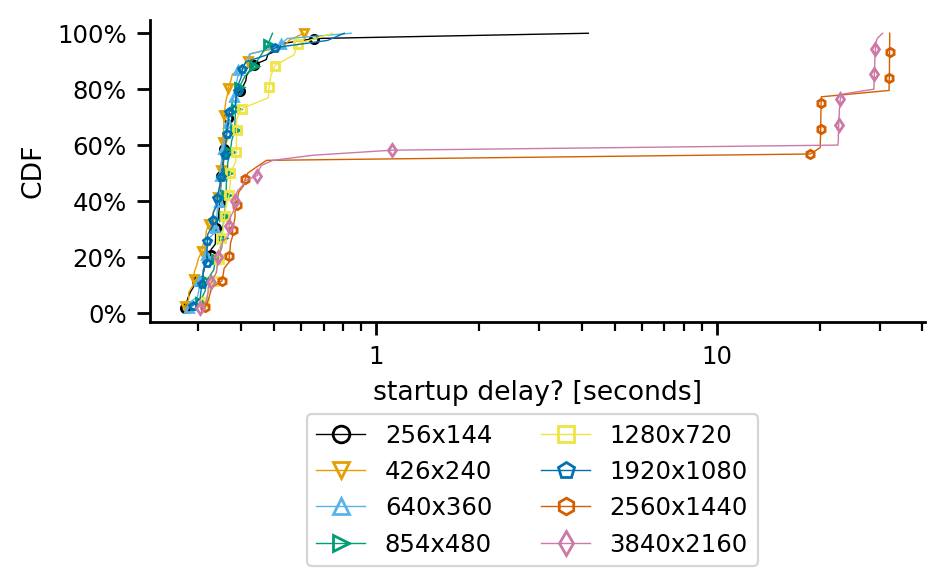

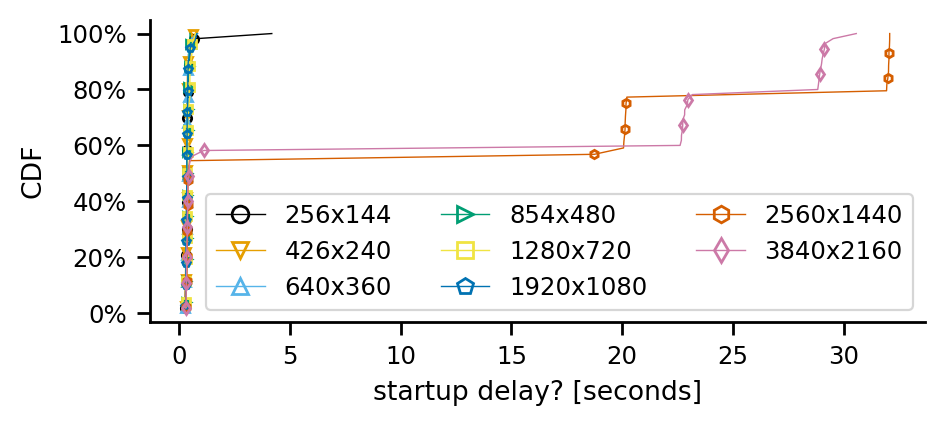

In [143]:
lnwidth = .5
mrksize = 3
figname = 'test'
for log in [True, False]:
    fig, ax = plt.subplots(figsize=(5,2))
    for resolution in df_start_time_with_meta.player_dimensions.unique():
        cdf = Cdf.MakeCdfFromList(df_start_time_with_meta[df_start_time_with_meta.player_dimensions == resolution]['startup_delay'])
        ax.plot(cdf.xs, cdf.ps, label=resolution,
                    linestyle='-', linewidth=lnwidth, 
                    markersize=mrksize, fillstyle='none', 
                    markevery=max(1, int(len(cdf.xs)/10)), drawstyle="default",
                    color=colors[resolution], marker=markers[resolution]
                   )


    
    #else:
    #ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: human_format(x)))
    #if log:
    #    ax.xaxis.set_major_formatter(PercentFormatter(xmax = 1.0, decimals=1))
    #else:
    ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.0))
    ax.spines['left'].set_position(('axes', -0.0))

    if not log:
        #ax.legend(loc='center', ncol=1, markerscale=10, bbox_to_anchor=(0.5, -.6))
        ax.legend(loc='lower right', ncol=3, markerscale=2)
    else:
        ax.set_xscale('log')
        #ax.set_xscale('symlog')
        ax.legend(loc='lower right', ncol=2, markerscale=2, bbox_to_anchor=(.8, -.85))

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:g}"))


    ax.set_title("")

    ax.set_xlabel("startup delay? [seconds]")

    ax.set_ylabel("CDF")


    #if log:
    #    fig.savefig(figname+'-log.pdf', format='pdf', bbox_inches='tight')
    #else:
    #    fig.savefig(figname+'.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [145]:
df_buffering = pd.read_sql_query("""
SELECT time, msm_id, curr_play_time, current_quality FROM iframe_api WHERE event_type = 'PlayerStateBUFFERING'
""", conn)

In [146]:
df_buffering

,time,msm_id,curr_play_time,current_quality
0,1.645035e+12,24fdef1c-a087-9736-abf0-4913a80e3f88,0.000000,unknown
1,1.645036e+12,7618731e-77bb-398c-804f-8749bd91e64e,0.000000,unknown
2,1.645036e+12,08a69630-1ba1-f7b7-9772-85bab6baa8bd,0.000000,unknown
3,1.645036e+12,72a7b5e0-9b49-0569-7eb7-bfe57806c0af,0.000000,unknown
4,1.645036e+12,71f797b6-e500-e0e3-b922-41aca902dd43,0.000000,unknown
...,...,...,...,...
648,1.645049e+12,588a971c-87c2-5f5c-e0d5-795b7aa4c308,23.054609,hd2160
649,1.645049e+12,1ab93042-62b8-1d71-b39b-291b3f0520b7,0.000000,unknown
650,1.645049e+12,d00dd8dc-b80c-54f1-d80c-678f8c42ff6f,0.000000,unknown
651,1.645049e+12,88557a9e-8aae-37f8-0380-fd547aac23eb,0.000000,unknown


In [160]:
df_buffering_with_meta = pd.merge(df_buffering, measurements[measurements.cacheWarming == 0][['msm_id', 'player_dimensions', 'domain']], on='msm_id')

In [151]:
df_buffering_with_meta[df_buffering_with_meta.curr_play_time != 0.].current_quality.unique()

array(['hd1440', 'hd2160'], dtype=object)

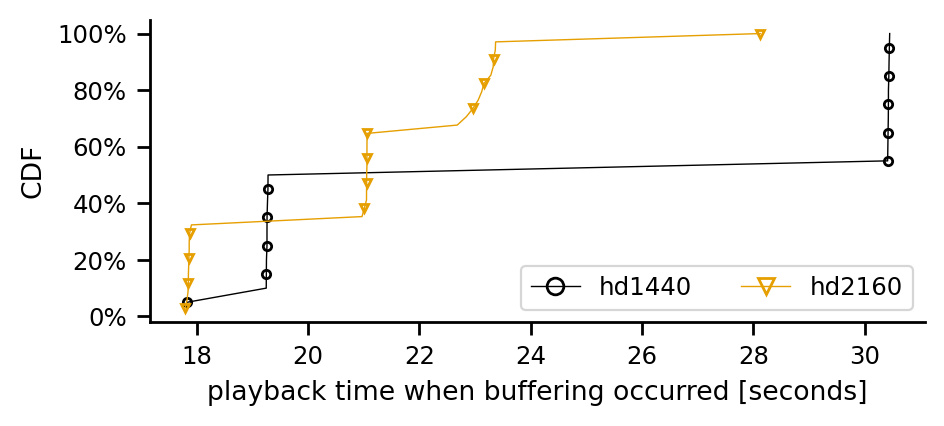

In [157]:
colors = dict(zip(['hd1440', 'hd2160'], ['C0','C1']))
markers = dict(zip(['hd1440', 'hd2160'], ['o','v']))
lnwidth = .5
mrksize = 3
figname = 'test'
for log in [False]:
    fig, ax = plt.subplots(figsize=(5,2))
    df_plt = df_buffering_with_meta[df_buffering_with_meta.curr_play_time != 0.]
    for quality in df_plt.current_quality.unique():
        cdf = Cdf.MakeCdfFromList(df_plt[df_plt.current_quality == quality]['curr_play_time'])
        ax.plot(cdf.xs, cdf.ps, label=quality,
                    linestyle='-', linewidth=lnwidth, 
                    markersize=mrksize, fillstyle='none', 
                    markevery=max(1, int(len(cdf.xs)/10)), drawstyle="default",
                    color=colors[quality], marker=markers[quality]
                   )


    
    #else:
    #ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: human_format(x)))
    #if log:
    #    ax.xaxis.set_major_formatter(PercentFormatter(xmax = 1.0, decimals=1))
    #else:
    ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.0))
    ax.spines['left'].set_position(('axes', -0.0))

    #if not log:
        #ax.legend(loc='center', ncol=1, markerscale=10, bbox_to_anchor=(0.5, -.6))
    ax.legend(loc='lower right', ncol=3, markerscale=2)
    if log:
        ax.set_xscale('log')
        #ax.set_xscale('symlog')
        #ax.legend(loc='lower right', ncol=2, markerscale=2, bbox_to_anchor=(.8, -.85))

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:g}"))


    ax.set_title("")

    ax.set_xlabel("playback time when buffering occurred [seconds]")

    ax.set_ylabel("CDF")


    #if log:
    #    fig.savefig(figname+'-log.pdf', format='pdf', bbox_inches='tight')
    #else:
    #    fig.savefig(figname+'.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [190]:
df_buffering_with_meta[(df_buffering_with_meta.curr_play_time >= 30.) & (df_buffering_with_meta.current_quality == 'hd1440')].domain.unique()

array(['aqz-KE-bpKQ'], dtype=object)

In [191]:
df_buffering_with_meta[(df_buffering_with_meta.curr_play_time < 20.) & (df_buffering_with_meta.curr_play_time > 15.) & (df_buffering_with_meta.current_quality == 'hd1440')].domain.unique()

array(['aqz-KE-bpKQ'], dtype=object)

In [162]:
df_buffering_with_meta[df_buffering_with_meta.curr_play_time != 0.].domain.value_counts()

aqz-KE-bpKQ    54
Name: domain, dtype: int64

In [192]:
df_buffering_with_meta[df_buffering_with_meta.curr_play_time == 0.].domain.value_counts()

aqz-KE-bpKQ    106
lqiN98z6Dak     99
RJnKaAtBPhA     89
Name: domain, dtype: int64

In [164]:
measurements[measurements.cacheWarming == 0].domain.value_counts()

aqz-KE-bpKQ    108
lqiN98z6Dak     99
RJnKaAtBPhA     90
Name: domain, dtype: int64

In [185]:
df_test = df_nerd_stats_with_meta.groupby(['player_dimensions', 'suggested_quality', 'domain'], as_index=False).agg(optimal_res_count=('optimal_res',lambda x: len(list(set(x)))), optimal_res_list=('optimal_res', lambda x: list(set(x))))
print(df_test[df_test.optimal_res_count > 1].optimal_res_list.astype(str).unique())
print(df_test[df_test.optimal_res_count > 1].domain.unique())

["['2560x1440', '3840x2160']"]
['aqz-KE-bpKQ']


In [186]:
df_test

,player_dimensions,suggested_quality,domain,optimal_res_count,optimal_res_list
0,1280x720,auto,RJnKaAtBPhA,1,[1280x720]
1,1280x720,auto,aqz-KE-bpKQ,1,[1280x720]
2,1280x720,auto,lqiN98z6Dak,1,[1280x720]
3,1280x720,hd1080,RJnKaAtBPhA,1,[1280x720]
4,1280x720,hd1080,aqz-KE-bpKQ,1,[1280x720]
...,...,...,...,...,...
210,854x480,medium,aqz-KE-bpKQ,1,[854x480]
211,854x480,medium,lqiN98z6Dak,1,[854x480]
212,854x480,small,RJnKaAtBPhA,1,[854x480]
213,854x480,small,aqz-KE-bpKQ,1,[854x480]
